<a href="https://colab.research.google.com/github/data2450/cnn--full/blob/main/cnn_from_my_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imge=image height * img weigth * channels

each pixels are ranging between 0-255

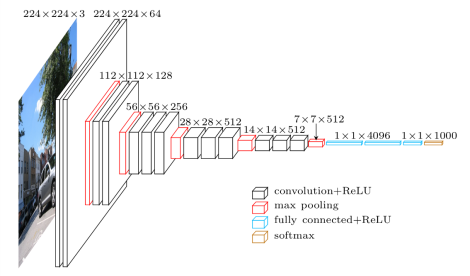

# What is a CNN ?

Convolutional neural networks refer to a sub-category of neural networks: they, therefore, have all the characteristics of neural networks. **However, CNN is specifically designed to process input images**. Their architecture is then more specific: it is composed of two main blocks.

**The first block** makes the particularity of this type of neural network since it functions as a feature extractor. To do this, it performs template matching by applying convolution filtering operations. The first layer filters the image with several convolution kernels and returns **“feature maps”**, which are then normalized (with an activation function) and/or resized.

This process can be repeated several times: we filter the features maps obtained with new kernels, which gives us new features maps to normalize and resize, and we can filter again, and so on. Finally, the values of the last feature maps are concatenated into a vector. This vector defines the output of the first block and the input of the second.


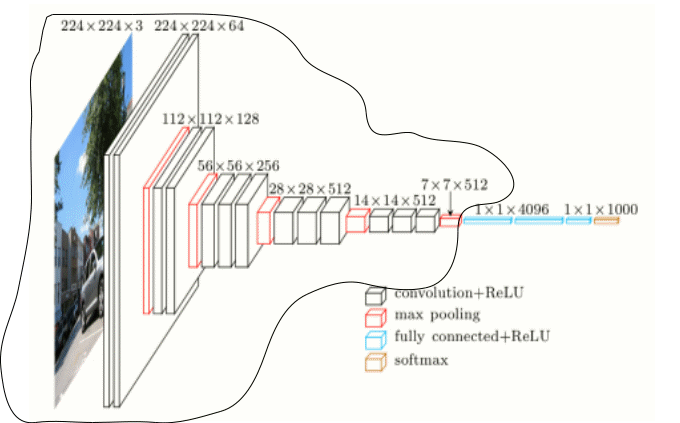

**The second block** is not characteristic of a CNN: it is in fact at the end of all the neural networks used for classification. The input vector values are transformed (with several linear combinations and activation functions) to return a new vector to the output. This last vector contains as many elements as there are classes: element i represents the probability that the image belongs to class i. Each element is therefore between 0 and 1, and the sum of all is worth 1. These probabilities are calculated by the last layer of this block (and therefore of the network), which uses a logistic function (binary classification) or a softmax function (multi-class classification) as an activation function.

As with ordinary neural networks, the parameters of the layers are determined by gradient backpropagation: the cross-entropy is minimized during the training phase. But in the case of CNN, these parameters refer in particular to the image features.

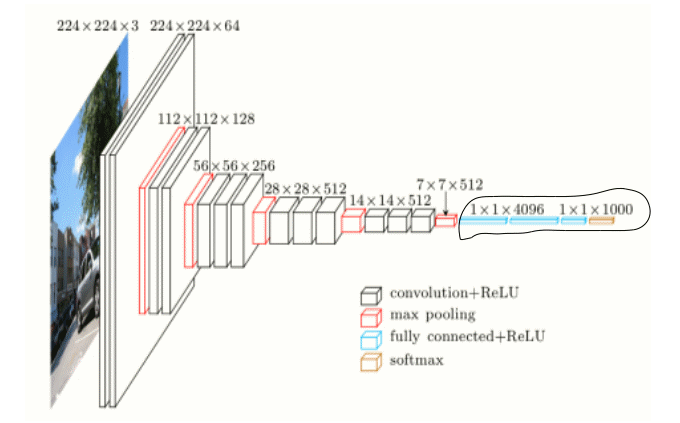

**Why ConvNets over Feed-Forward Neural Nets?**

An image is nothing but a matrix of pixel values, right? So why not just flatten the image (e.g. 3x3 image matrix into a 9x1 vector) and feed it to a Multi-Level Perceptron for classification purposes? Uh.. not really. In cases of extremely basic binary images, the method might show an average precision score while performing prediction of classes but would have little to no accuracy when it comes to complex images having pixel dependencies throughout.
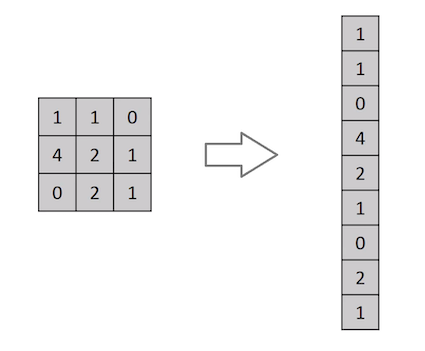

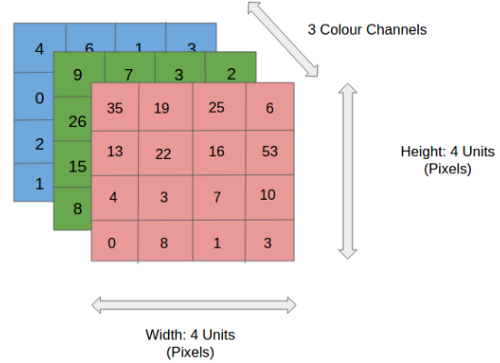

In the figure, we have an RGB image which has been separated by its three color planes — Red, Green, and Blue. There are a number of such color spaces in which images exist — Grayscale, RGB, HSV, CMYK, etc. You can imagine how computationally intensive things would get once the images reach dimensions, say 8K (7680×4320). The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction. This is important when we are to design an architecture which is not only good at learning features but also is scalable to massive datasets.

# The different layers of a CNN

There are four types of layers for a convolutional neural network:

1)**convolutional** layer

2)**pooling** layer

3)**ReLU** correction

4)**fully**-connected (flattening)

## The convolutional layer

Convolution is the first layer to extract features from an input image. Convolution preserves the relationship between pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs such as image matrix and a filter or kernel.

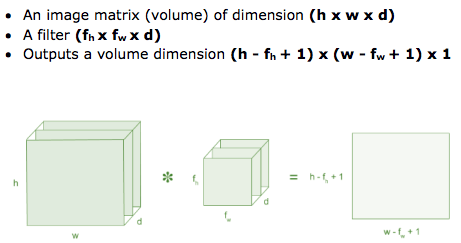



Consider a 5 x 5 whose image pixel values are 0, 1 and filter matrix 3 x 3 as shown in below

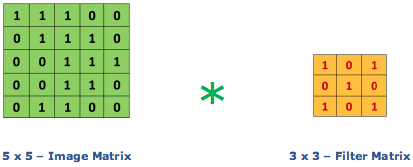

Then the convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called **“Feature Map”** as output shown in below
<img src="https://miro.medium.com/max/500/1*GcI7G-JLAQiEoCON7xFbhg.gif">

The filter moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

<img src="https://miro.medium.com/max/700/1*ciDgQEjViWLnCbmX-EeSrA.gif">

In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Matrix Multiplication is performed between Kn and In stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

<img src="https://miro.medium.com/max/395/1*1VJDP6qDY9-ExTuQVEOlVg.gif">

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.

There are two types of results to the operation — one in which the convolved feature is reduced in dimensionality as compared to the input, and the other in which the dimensionality is either increased or remains the same. This is done by applying **Valid Padding** in case of the former, or **Same Padding** in the case of the latter.

<img src="https://miro.medium.com/max/395/1*nYf_cUIHFEWU1JXGwnz-Ig.gif">

*SAME padding: 5x5x1 image is padded with 0s to create a 6x6x1 image*

When we augment the 5x5x1 image into a 6x6x1 image and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. Hence the name — **Same Padding**.

 On the other hand, if we perform the same operation without padding, we are presented with a matrix which has dimensions of the Kernel (3x3x1) itself — **Valid Padding**.


>there will be many number of filters ,there will that much output layers also

>how do we decide the inner values of the filter: it is initialised with some random values.

>the filters can be of different sizes


>later on the values inside with the each and every  filters get learned by back propgation  

>based on the loss function the back propagation gets worked

>it will keep on updating the filter values according the loss function.



## Non Linearity (ReLU)
ReLU stands for Rectified Linear Unit for a non-linear operation. The output is **ƒ(x) = max(0,x)**.

Why ReLU is important : ReLU’s purpose is to introduce non-linearity in our ConvNet. Since, the real world data would want our ConvNet to learn would be non-negative linear values.

 
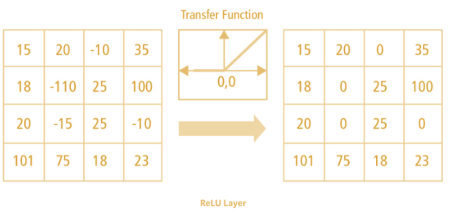


> A convalution operation always end with an relu activation function.

## Pooling Layer
<img src="https://miro.medium.com/max/396/1*uoWYsCV5vBU8SHFPAPao-w.gif">



1.   Max Pooling
2.   Average Pooling
3.   Sum Pooling




Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to **decrease the** **computational power required to process** **the data** through dimensionality reduction. Furthermore, it is useful for **extracting dominant features** which are rotational and positional invariant, thus maintaining the process of effectively training of the model.


>There are two types of Pooling: Max Pooling and Average Pooling. **Max 
Pooling** returns the **maximum value** from the portion of the image covered by the Kernel. On the other hand, **Average Pooling** returns the **average of all the values** from the portion of the image covered by the Kernel.



>Max Pooling also performs as a **Noise Suppressant**. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that **Max Pooling performs a lot better than Average Pooling**.



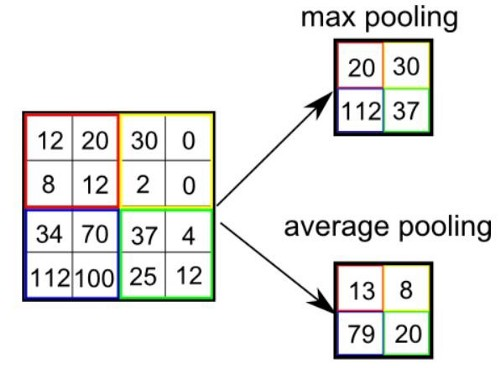

The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. Depending on the complexities in the images, the number of such layers may be increased for capturing low-levels details even further, but at the cost of more computational power.


After going through the above process, we have successfully enabled the model to understand the features. Moving on, we are going to flatten the final output and feed it to a regular Neural Network for classification purposes.

## Classification — Fully Connected Layer (FC Layer)

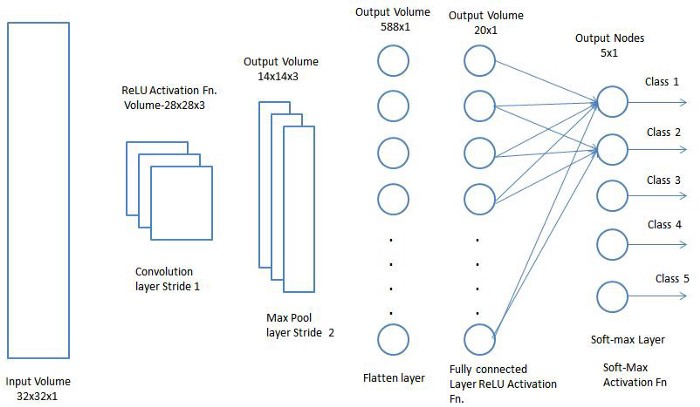


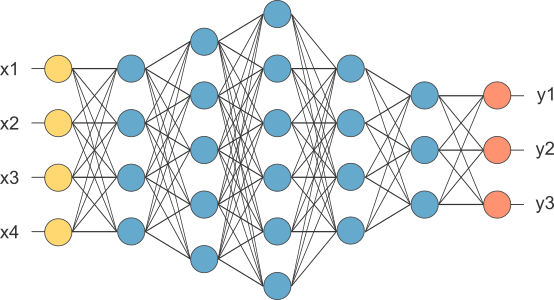

Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.


Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.


There are various architectures of CNNs available which have been key in building algorithms which power and shall power AI as a whole in the foreseeable future. Some of them have been listed below:



1.  LeNet 
2. AlexNet  

1. VGGNet  
2. GoogLeNet  


5.   ResNet

2.   ZFNet





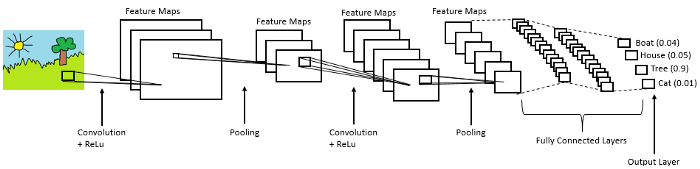

**Summary**



*   Provide input image into convolution layer

*   Choose parameters, apply filters with strides, padding if requires. Perform convolution on the image and apply ReLU activation to the matrix.

*   Perform pooling to reduce dimensionality size
*   Add as many convolutional layers until satisfied


*   Flatten the output and feed into a fully connected layer (FC Layer)


*   Output the class using an activation function (Logistic Regression with cost functions) and classifies images.



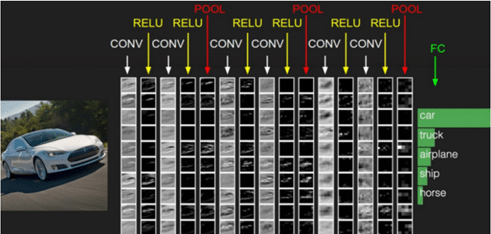